Starting Portfolio Value: 10000.00
Final Portfolio Value: 10124.65


Start date,2018-01-24
End date,2019-01-23
Total months,11
,Backtest
Annual return,1.3%
Cumulative returns,1.2%
Annual volatility,4.8%
Sharpe ratio,0.29
Calmar ratio,0.32
Stability,0.43
Max drawdown,-4.0%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,4.03,2018-08-09,2018-10-26,NaT,NaN
1,2.14,2018-06-13,2018-07-16,2018-07-26,32
2,2.07,2018-02-23,2018-04-26,2018-05-24,65
3,0.54,2018-05-28,2018-06-04,2018-06-08,10
4,0.26,2018-08-06,2018-08-07,2018-08-08,3


Stress Events,mean,min,max
New Normal,0.01%,-0.98%,1.20%


Top 10 long positions of all time,max
Data0,18.47%


Top 10 short positions of all time,max


Top 10 positions of all time,max
Data0,18.47%


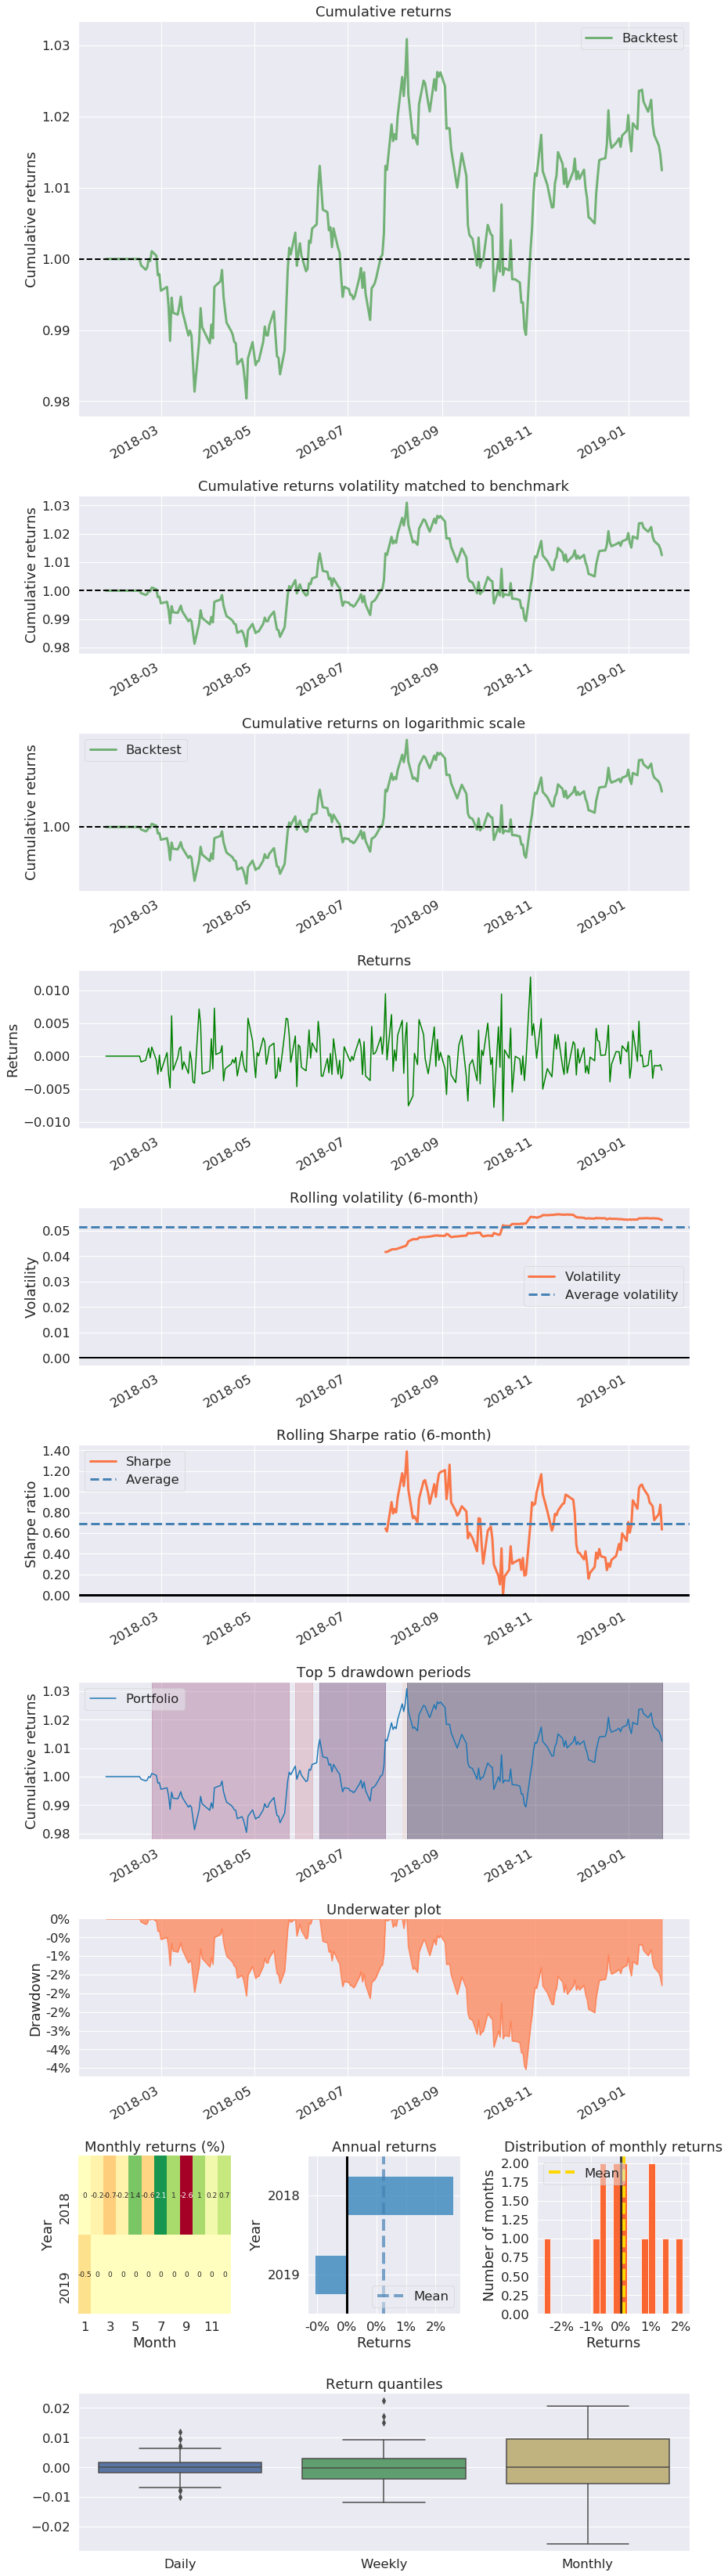

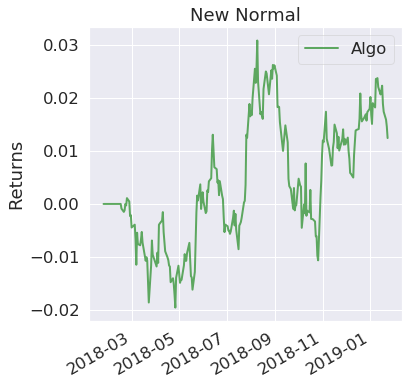

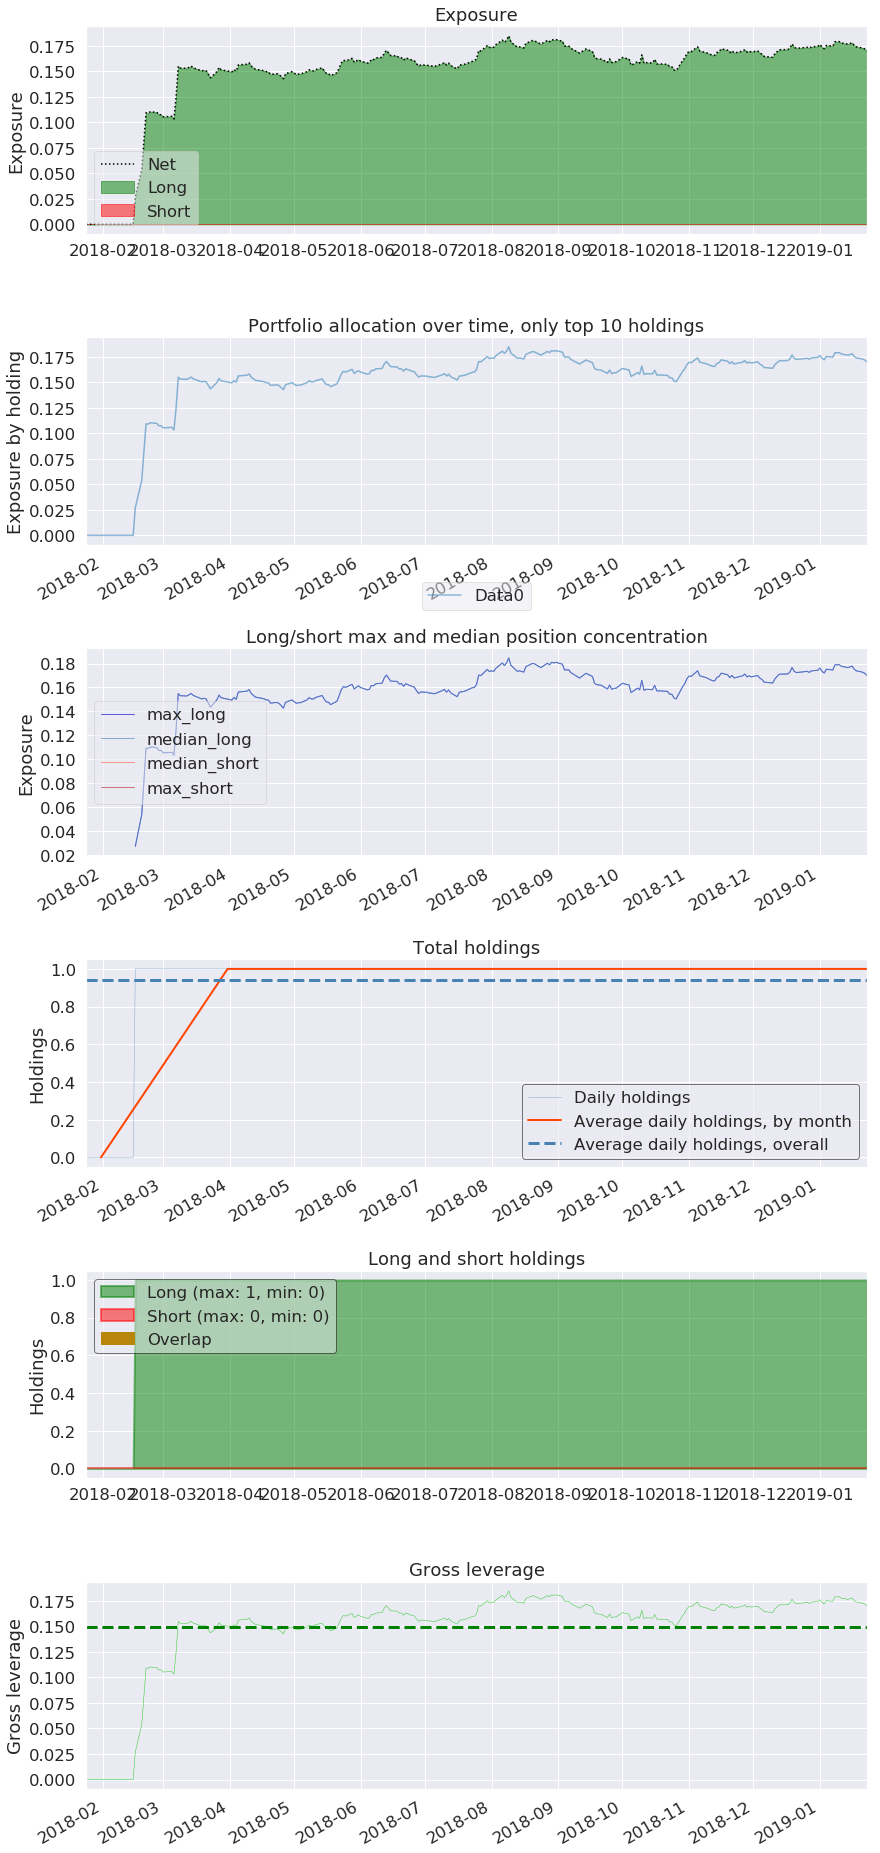

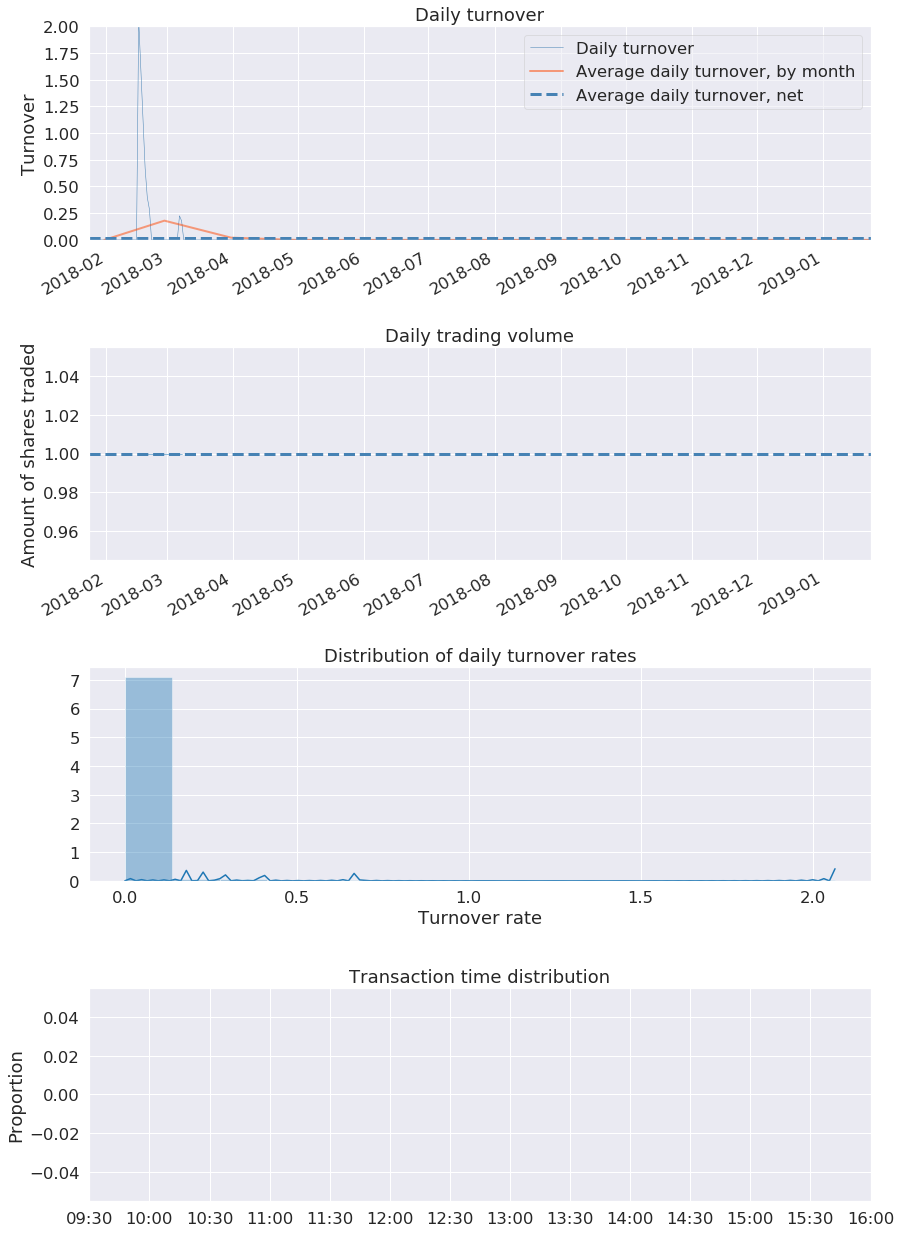

In [164]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])
import matplotlib
import pyfolio as pf
# Import the backtrader platform
import backtrader as bt
import pandas as pd
import backtrader.feeds as btfeeds

import backtrader.analyzers as btanalyzers

# Create a Stratey
class TestStrategy(bt.Strategy):

 
    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        self.rsi = bt.talib.RSI(self.data,period=20)

    def next(self):     
            if self.rsi[0] < 20:
                self.buy()
                
            if self.rsi[0] > 80:
                self.buy()             


if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(TestStrategy)
    cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')

    # Datas are in a subfolder of the samples. Need to find where the script is
    # because it could have been called from anywhere
    datapath = ('SBIN.csv')

    # Create a Data Feed
    dataframe = pd.read_csv(datapath,parse_dates=True,
                                index_col=0)
    
    data = bt.feeds.PandasData(dataname=dataframe)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(10000.0)

    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    
    
    # Run over everything
    cerebro.run()
    

    
    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    results = cerebro.run()
    
    strat = results[0]
    pyfoliozer = strat.analyzers.getbyname('pyfolio')
    returns, positions, transactions,tushar = pyfoliozer.get_pf_items()
    pf.create_full_tear_sheet(returns,positions=positions,transactions=transactions,round_trips=False)
 

# At this point tables and chart will show up
   
